## 概率统计方法

### 简介

`Python` 中常用的统计工具有 `Numpy, Pandas, PyMC, StatsModels` 等。

`Scipy` 中的子库 `scipy.stats` 中包含很多统计上的方法。

导入 `numpy` 和 `matplotlib`：

In [17]:
from matplotlib.pyplot import *
from numpy import *

In [5]:
heights = array([1.46, 1.79, 2.01, 1.75, 1.56, 1.69, 1.88, 1.76, 1.88, 1.78])

heights

array([1.46, 1.79, 2.01, 1.75, 1.56, 1.69, 1.88, 1.76, 1.88, 1.78])

Numpy 自带简单的统计方法：

In [6]:
print('mean, ', heights.mean())
print('min, ', heights.min())
print('max, ', heights.max())
print('standard deviation, ', heights.std())

mean,  1.7559999999999998
min,  1.46
max,  2.01
standard deviation,  0.15081114017207078


导入 `Scipy` 的统计模块：

In [9]:
import scipy.stats as st
from scipy import nanmedian

其他统计量：

In [13]:
print('median, ', nanmedian(heights))    # 忽略nan值之后的中位数
print('mode, ', st.mode(heights))           # 众数及其出现次数
print('skewness, ', st.skew(heights))       # 偏度
print('kurtosis, ', st.kurtosis(heights))   # 峰度
print('and so many more...')

median,  1.77
mode,  ModeResult(mode=array([1.88]), count=array([2]))
skewness,  -0.3935244564726347
kurtosis,  -0.33067209772439865
and so many more...


C:\Users\86183\AppData\Local\Temp\ipykernel_9480\1207425199.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print('mode, ', st.mode(heights))           # 众数及其出现次数


### 概率分布

常见的[连续概率分布](https://zh.wikipedia.org/wiki/Category:%E8%BF%9E%E7%BB%AD%E5%88%86%E5%B8%83)有：
- 均匀分布
- 正态分布
- 学生t分布
- F分布
- Gamma分布
- ...

[离散概率分布](https://zh.wikipedia.org/wiki/Category:%E7%A6%BB%E6%95%A3%E5%88%86%E5%B8%83)
- 伯努利分布
- 几何分布
- ...

这些都可以在 `scipy.stats` 中找到。

### 连续分布

#### 正态分布

以[正态分布](https://zh.wikipedia.org/wiki/%E6%AD%A3%E6%80%81%E5%88%86%E5%B8%83)为例，先导入正态分布：

In [14]:
from scipy.stats import norm

它包含四类常用的函数：

- `norm.cdf` 返回对应的[累计分布函数](https://zh.wikipedia.org/wiki/%E7%B4%AF%E7%A7%AF%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0)值
- `norm.pdf` 返回对应的[概率密度函数](https://zh.wikipedia.org/wiki/%E6%A9%9F%E7%8E%87%E5%AF%86%E5%BA%A6%E5%87%BD%E6%95%B8)值
- `norm.rvs` 产生指定参数的随机变量
- `norm.fit` 返回给定数据下，各参数的[最大似然估计](https://zh.wikipedia.org/wiki/%E6%9C%80%E5%A4%A7%E4%BC%BC%E7%84%B6%E4%BC%B0%E8%AE%A1)（MLE）值

从正态分布产生500个随机点：

In [16]:
x_norm = norm.rvs(size=500)
type(x_norm)

<class 'numpy.ndarray'>


array([ 5.80895768e-01,  1.11213447e-01,  2.36400125e+00,  3.41978292e-01,
        1.91746788e-01,  1.31739512e+00,  1.00389843e+00,  3.25620980e-01,
        3.55857989e-01, -1.06272797e+00,  8.50450701e-01, -1.31744831e-01,
       -1.16908454e+00, -1.30979105e+00,  9.62277066e-01, -4.39364019e-01,
        9.96839757e-01,  1.84214689e-01, -6.64492080e-01,  6.26742982e-02,
       -5.59731427e-01, -7.94947228e-01,  4.95733977e-01,  5.07837203e-01,
       -4.31174720e-01, -9.86732053e-02,  1.29457597e-01, -1.17636761e+00,
       -2.30212423e-01, -2.36754849e-01,  3.49334941e-02, -1.26767513e+00,
        3.46544638e-02,  7.46436564e-01,  4.01657004e-01, -3.71189641e-01,
        1.94207874e+00, -1.77193018e+00,  3.62231874e-01, -5.83505736e-01,
       -6.35548946e-02, -1.21504095e+00,  1.18129648e-01,  1.56009062e+00,
       -3.73911957e-01, -6.55760020e-01, -5.01059780e-01,  6.48386547e-01,
       -5.13673304e-01,  4.11253270e-01, -1.69726077e-01,  3.25665926e-01,
       -1.54469902e-01,  

直方图：

counts,  [  3.  16.  46.  98. 139.  98.  66.  27.   6.   1.]
bin centers [-2.93032775 -2.28610021 -1.64187268 -0.99764514 -0.3534176   0.29080993
  0.93503747  1.57926501  2.22349254  2.86772008  3.51194762]


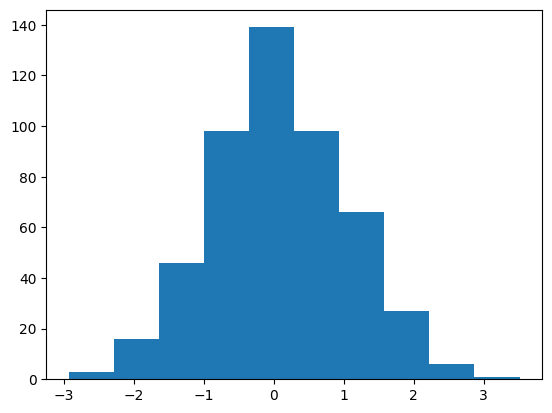

In [18]:
h = hist(x_norm)
print('counts, ', h[0])
print('bin centers', h[1])

归一化直方图（用出现频率代替次数），将划分区间变为 `20`（默认 `10`）：

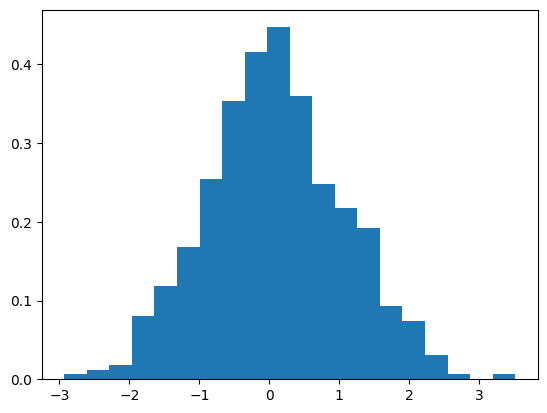

In [20]:
h = hist(x_norm, density=True, bins=20)

在这组数据下，正态分布参数的最大似然估计值为：

In [21]:
x_mean, x_std = norm.fit(x_norm)

print('mean, ', x_mean)
print('x_std, ', x_std)

mean,  0.08826691853556168
x_std,  0.9810343651686417


将真实的概率密度函数与直方图进行比较：

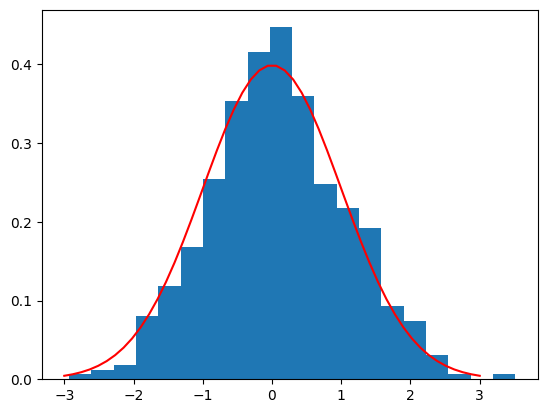

In [22]:
h = hist(x_norm, density=True, bins=20)

x = linspace(-3,3,50)
p = plot(x, norm.pdf(x), 'r-')

导入积分函数：

In [23]:
from scipy.integrate import trapz

通过积分，计算落在某个区间的概率大小：

95.45% of the values lie between -2 and 2


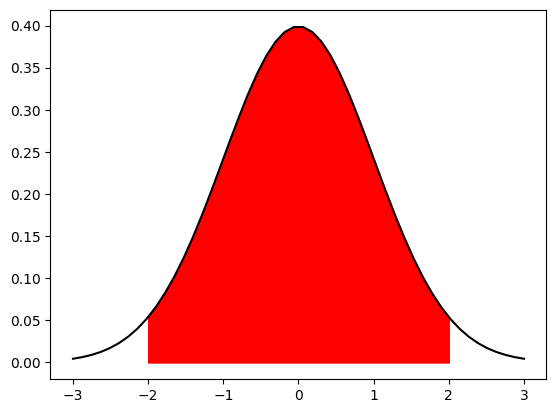

In [24]:
x1 = linspace(-2,2,108)
p = trapz(norm.pdf(x1), x1)
print('{:.2%} of the values lie between -2 and 2'.format(p))

fill_between(x1, norm.pdf(x1), color = 'red')
plot(x, norm.pdf(x), 'k-')

默认情况，正态分布的参数为均值0，标准差1，即标准正态分布。

可以通过 `loc` 和 `scale` 来调整这些参数，一种方法是调用相关函数时进行输入：

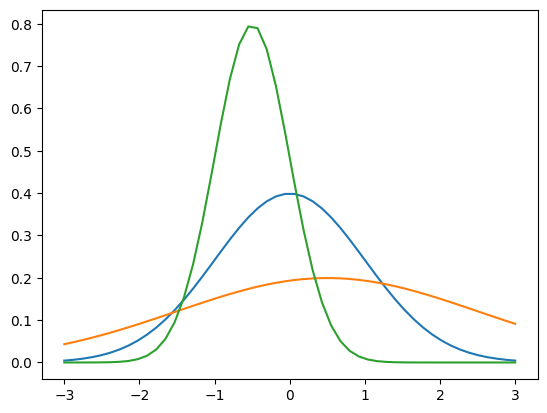

In [25]:
p = plot(x, norm.pdf(x, loc=0, scale=1))
p = plot(x, norm.pdf(x, loc=0.5, scale=2))
p = plot(x, norm.pdf(x, loc=-0.5, scale=.5))

另一种则是将 `loc`, `scale` 作为参数直接输给 `norm` 生成相应的分布：

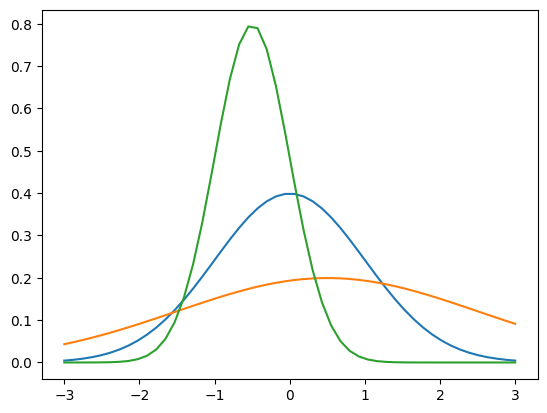

In [26]:
p = plot(x, norm(loc=0, scale=1).pdf(x))
p = plot(x, norm(loc=0.5, scale=2).pdf(x))
p = plot(x, norm(loc=-0.5, scale=.5).pdf(x))

其他连续分布

In [27]:
from scipy.stats import lognorm, t, dweibull

支持与 `norm` 类似的操作，如概率密度函数等。

不同参数的[对数正态分布](https://zh.wikipedia.org/wiki/%E5%AF%B9%E6%95%B0%E6%AD%A3%E6%80%81%E5%88%86%E5%B8%83)：

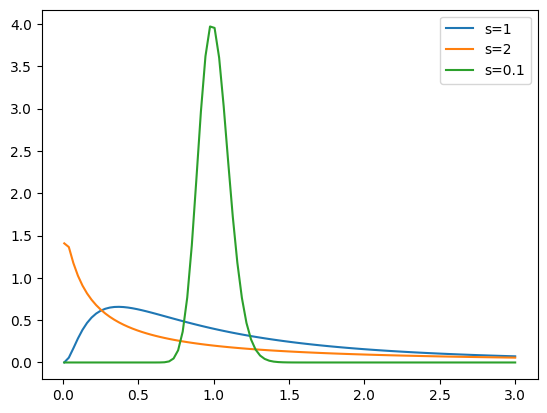

In [28]:
x = linspace(0.01, 3, 100)

plot(x, lognorm.pdf(x, 1), label='s=1')
plot(x, lognorm.pdf(x, 2), label='s=2')
plot(x, lognorm.pdf(x, .1), label='s=0.1')

legend()

不同的[韦氏分布](https://zh.wikipedia.org/wiki/%E9%9F%A6%E4%BC%AF%E5%88%86%E5%B8%83)：

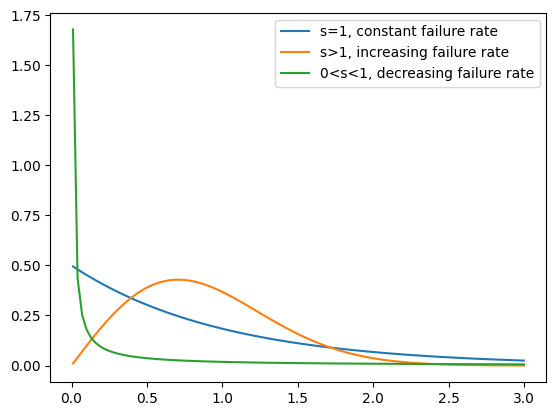

In [29]:
x = linspace(0.01, 3, 100)

plot(x, dweibull.pdf(x, 1), label='s=1, constant failure rate')
plot(x, dweibull.pdf(x, 2), label='s>1, increasing failure rate')
plot(x, dweibull.pdf(x, .1), label='0<s<1, decreasing failure rate')

legend()

不同自由度的[学生 t 分布](https://zh.wikipedia.org/wiki/%E5%AD%A6%E7%94%9Ft-%E5%88%86%E5%B8%83)：

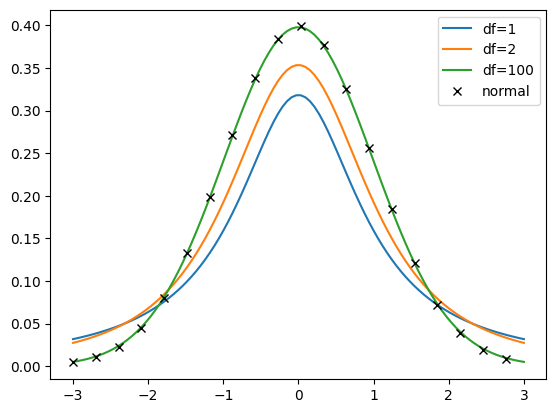

In [30]:
x = linspace(-3, 3, 100)

plot(x, t.pdf(x, 1), label='df=1')
plot(x, t.pdf(x, 2), label='df=2')
plot(x, t.pdf(x, 100), label='df=100')
plot(x[::5], norm.pdf(x[::5]), 'kx', label='normal')

legend()

### 离散分布

导入离散分布：

In [31]:
from scipy.stats import binom, poisson, randint

离散分布没有概率密度函数，但是有[概率质量函数](https://zh.wikipedia.org/wiki/%E6%A6%82%E7%8E%87%E8%B4%A8%E9%87%8F%E5%87%BD%E6%95%B0)。

[离散均匀分布](https://zh.wikipedia.org/wiki/%E9%9B%A2%E6%95%A3%E5%9E%8B%E5%9D%87%E5%8B%BB%E5%88%86%E4%BD%88)的概率质量函数（PMF）：

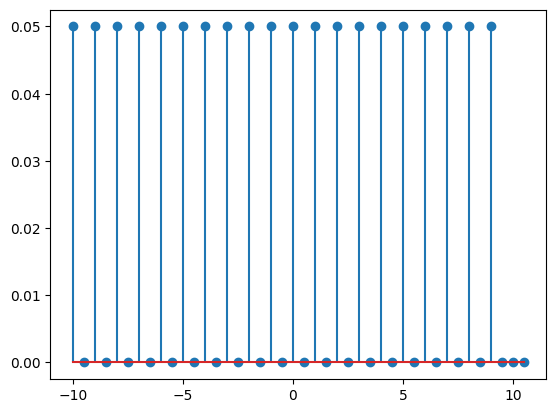

In [32]:
high = 10
low = -10

x = arange(low, high+1, 0.5)
p = stem(x, randint(low, high).pmf(x))  # 杆状图

[二项分布](https://zh.wikipedia.org/wiki/%E4%BA%8C%E9%A0%85%E5%88%86%E4%BD%88)：

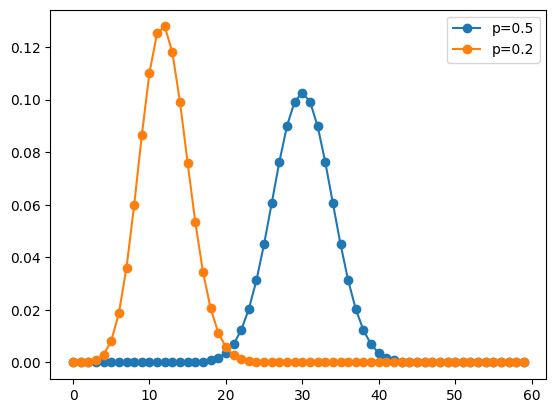

In [33]:
num_trials = 60
x = arange(num_trials)

plot(x, binom(num_trials, 0.5).pmf(x), 'o-', label='p=0.5')
plot(x, binom(num_trials, 0.2).pmf(x), 'o-', label='p=0.2')

legend()

[泊松分布](https://zh.wikipedia.org/wiki/%E6%B3%8A%E6%9D%BE%E5%88%86%E4%BD%88)：

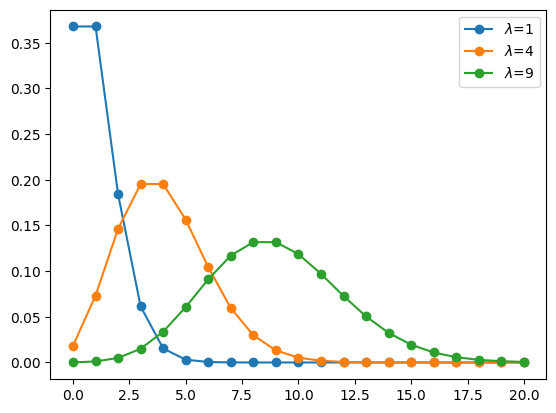

In [34]:
x = arange(0,21)

plot(x, poisson(1).pmf(x), 'o-', label=r'$\lambda$=1')
plot(x, poisson(4).pmf(x), 'o-', label=r'$\lambda$=4')
plot(x, poisson(9).pmf(x), 'o-', label=r'$\lambda$=9')

legend()

### 自定义离散分布

导入要用的函数：

In [35]:
from scipy.stats import rv_discrete

一个不均匀的骰子对应的离散值及其概率：

In [36]:
xk = [1, 2, 3, 4, 5, 6]
pk = [.3, .35, .25, .05, .025, .025]

定义离散分布：

In [37]:
loaded = rv_discrete(values=(xk, pk))

此时， `loaded` 可以当作一个离散分布的模块来使用。

产生两个服从该分布的随机变量：

In [38]:
loaded.rvs(size=2)

array([1, 2])

产生100个随机变量，将直方图与概率质量函数进行比较：

<StemContainer object of 3 artists>

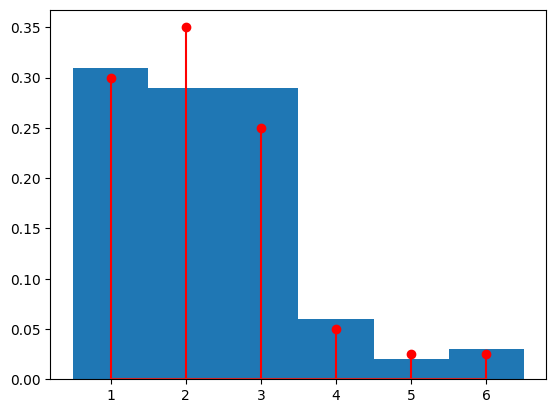

In [40]:
samples = loaded.rvs(size=100)
bins = linspace(.5,6.5,7)

hist(samples, bins=bins, density=True)
stem(xk, loaded.pmf(xk), markerfmt='ro', linefmt='r-')

### 假设检验

导入相关的函数：
- 正态分布
- 独立双样本 `t` 检验，配对样本 `t` 检验，单样本 `t` 检验
- 学生 `t` 分布

`t` 检验的相关内容请参考：
- 百度百科-t 检验：http://baike.baidu.com/view/557340.htm
- 维基百科-学生 t 检验：https://en.wikipedia.org/wiki/Student%27s_t-test

In [41]:
from scipy.stats import norm
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp
from scipy.stats import t

独立样本 t 检验
两组参数不同的正态分布：

In [42]:
n1 = norm(loc=0.3, scale=1.0)
n2 = norm(loc=0, scale=1.0)

从分布中产生两组随机样本：

In [43]:
n1_samples = n1.rvs(size=100)
n2_samples = n2.rvs(size=100)

将两组样本混合在一起：

In [44]:
samples = hstack((n1_samples, n2_samples))

array([ 0.09363118,  0.15182951,  1.8656747 ,  0.32015817, -0.25883553,
        0.55234149,  0.35898458,  0.96032833, -0.55427402,  0.44515602,
        0.74383523, -0.43250984, -0.06083194, -0.58248064, -0.04805727,
        0.77062734,  0.08028292, -0.25697414,  1.7712164 , -0.63431872,
        0.65994254,  0.05278797,  0.04669196,  0.46083688,  0.13737951,
        0.67286467,  0.42386665,  0.15216377,  0.15338221, -0.87266254,
        1.56334096, -0.81035902, -1.25644168,  1.45511004, -0.40985631,
        0.00662397, -1.44710401, -0.56124044,  0.14249917,  1.59936747,
        0.03844513, -2.74766532, -0.19897162, -0.0694864 ,  0.40789262,
       -0.18279229,  1.27141116,  1.22752103, -0.47804519,  1.00052248,
       -0.26544084,  0.3148657 ,  1.35762076, -1.30074849,  1.90776328,
       -1.00873522, -0.6093366 ,  0.66886091, -0.51362015,  1.22153422,
        1.20213818, -1.67776711,  0.74930431, -1.61633616,  1.09067553,
        1.72368244,  1.5550102 ,  0.66370554,  0.34625179,  0.86

最大似然参数估计：

In [45]:
loc, scale = norm.fit(samples)
n = norm(loc=loc, scale=scale)

比较：

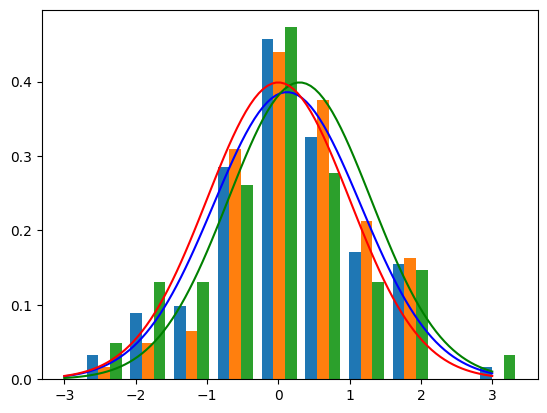

In [47]:
x = linspace(-3,3,100)

hist([samples, n1_samples, n2_samples], density=True)
plot(x, n.pdf(x), 'b-')
plot(x, n1.pdf(x), 'g-')
plot(x, n2.pdf(x), 'r-')

独立双样本 `t` 检验的目的在于判断两组样本之间是否有显著差异：

In [48]:
t_val, p = ttest_ind(n1_samples, n2_samples)

print('t = {}'.format(t_val))
print('p-value = {}'.format(p))

t = 1.4232892774385015
p-value = 0.15622608850992567


`p` 值小，说明这两个样本有显著性差异。

### 配对样本 t 检验

配对样本指的是两组样本之间的元素一一对应，例如，假设我们有一组病人的数据：

In [49]:
pop_size = 35

pre_treat = norm(loc=0, scale=1)
n0 = pre_treat.rvs(size=pop_size)

经过某种治疗后，对这组病人得到一组新的数据：

In [50]:
effect = norm(loc=0.05, scale=0.2)
eff = effect.rvs(size=pop_size)

n1 = n0 + eff

新数据的最大似然估计：

In [51]:
loc, scale = norm.fit(n1)
post_treat = norm(loc=loc, scale=scale)

画图：

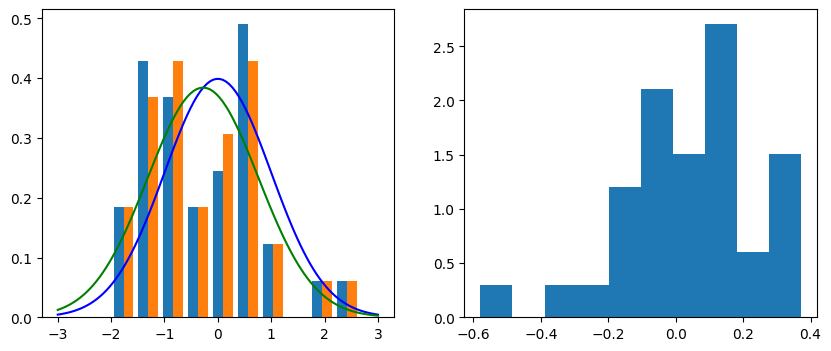

In [52]:
fig = figure(figsize=(10,4))

ax1 = fig.add_subplot(1,2,1)
h = ax1.hist([n0, n1], density=True)
p = ax1.plot(x, pre_treat.pdf(x), 'b-')
p = ax1.plot(x, post_treat.pdf(x), 'g-')

ax2 = fig.add_subplot(1,2,2)
h = ax2.hist(eff, density=True)

独立 `t` 检验：

In [53]:
t_val, p = ttest_ind(n0, n1)

print('t = {}'.format(t_val))
print('p-value = {}'.format(p))

t = -0.12846338519319045
p-value = 0.898161459003438


高 `p` 值说明两组样本之间没有显著性差异。

配对 `t` 检验：

In [54]:
t_val, p = ttest_rel(n0, n1)

print('t = {}'.format(t_val))
print('p-value = {}'.format(p))

t = -0.9571768257536741
p-value = 0.34523506629833245


配对 `t` 检验的结果说明，配对样本之间存在显著性差异，说明治疗时有效的，符合我们的预期。

### `p` 值计算原理

`p` 值对应的部分是下图中的红色区域，边界范围由 `t` 值决定。

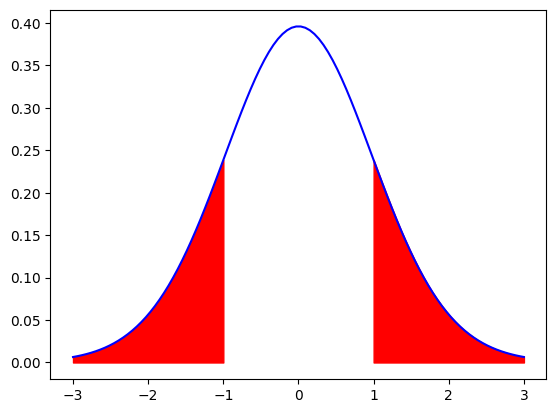

In [55]:
my_t = t(pop_size) # 传入参数为自由度，这里自由度为50

p = plot(x, my_t.pdf(x), 'b-')
lower_x = x[x<= -abs(t_val)]
upper_x = x[x>= abs(t_val)]

p = fill_between(lower_x, my_t.pdf(lower_x), color='red')
p = fill_between(upper_x, my_t.pdf(upper_x), color='red')